   Pressure (psia)  Real Volume (cc)  Ideal Volume (cc)  Z_Factor
0              300            2529.0             2629.0     0.962
1              750             964.0             1051.6     0.917
2             1500             453.0              525.8     0.862
3             2500             265.0              315.5     0.840
4             4000             180.0              197.2     0.913
5             5000             156.5              157.7     0.992
6             6000             142.2              131.5     1.082


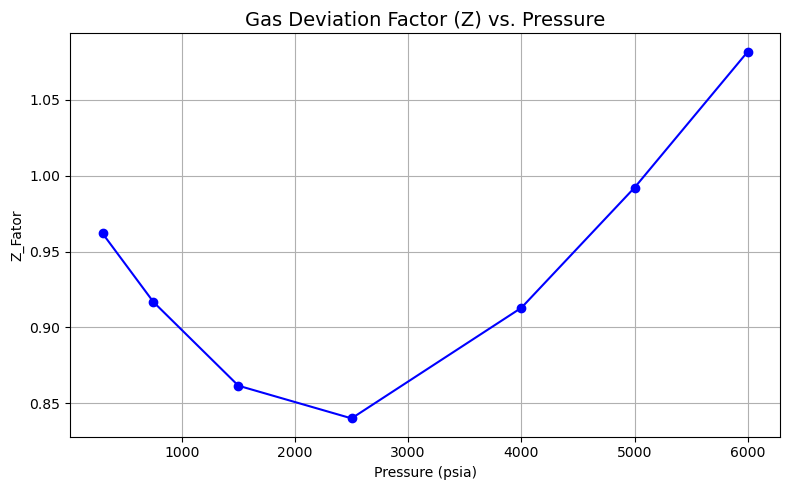

In [6]:
"Problem 2.10(a)"

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define known constants
P1 = 14.7       # psia (STD pressure)
V1 = 45000      # cc (volume initial at STD conditions)
T1 = 60 + 460   # °R (STD temperature)
T2 = 160 + 460  # °R (reservoir temperature)

# Step 2: Enter experimental data
pressures = [300, 750, 1500, 2500, 4000, 5000, 6000]        # psia
real_volumes = [2529, 964, 453, 265, 180, 156.5, 142.2]     # cc

# Strep 3: Calculate ideal volumes at each pressure using Ideal Gas Law
ideal_volumes = [(P1 * V1 * T2) / (P * T1) for P in pressures]

# Step 4: Calculate d eviation factor Z = V_real / V_ideal
z_factors = [v_real / v_ideal for v_real, v_ideal in zip(real_volumes, ideal_volumes)]

# Step 5: Create a DataFrame for display and export
df = pd.DataFrame({
    'Pressure (psia)': pressures,
    'Real Volume (cc)': real_volumes,
    'Ideal Volume (cc)': [round(v, 1) for v in ideal_volumes],
    'Z_Factor': [round(z, 3) for z in z_factors]
})


# Step 6: Show DataFrame
print(df)

# Step 7: Plot Z_factor vs Pressure
plt.figure(figsize=(8, 5))
plt.plot(pressures, z_factors, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Gas Deviation Factor (Z) vs. Pressure', fontsize = 14)
plt.xlabel('Pressure (psia)'); plt.ylabel('Z_Fator')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Save to CSV (Optional)
df.to_csv('gas_deviation_factors_2_10a.csv', index=False)


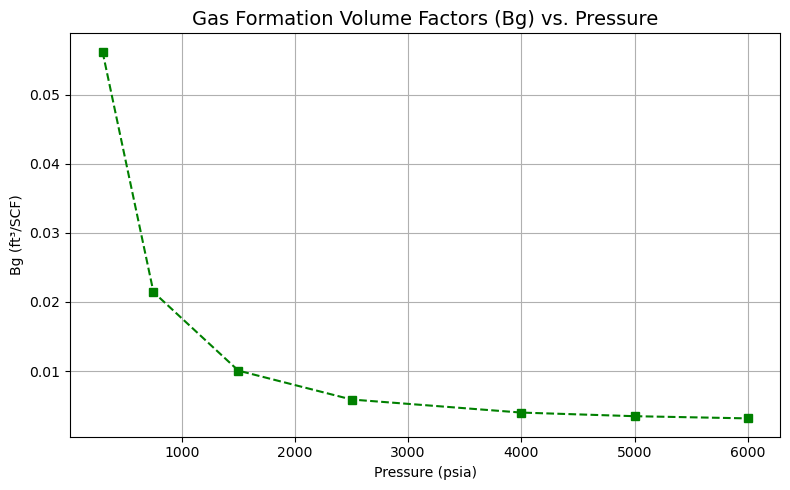

In [9]:
"Problem 2.10(b)"

# Step 1: Define temperature in Rankine
T2 = 160 + 460  # °R (reservoir temperature)

# Step 2: Bg for each pressure; Bg in ft³/SCF
bg_values = [(0.02827 * Z * T2) / P for Z, P in zip(z_factors, pressures)]

# Step 3: Add Bg to the DataFrame
df["Bg (ft³/SCF)"] = [round(bg, 5) for bg in bg_values]

# Display updated DataFrame
df

# Plot Bg vs. Pressure
plt.figure(figsize=(8, 5))
plt.plot(pressures, bg_values, marker = 's', linestyle = '--', color = 'green')
plt.title('Gas Formation Volume Factors (Bg) vs. Pressure', fontsize = 14)
plt.xlabel('Pressure (psia)'); plt.ylabel('Bg (ft³/SCF)')
plt.grid(True)
plt.tight_layout()
plt.show()

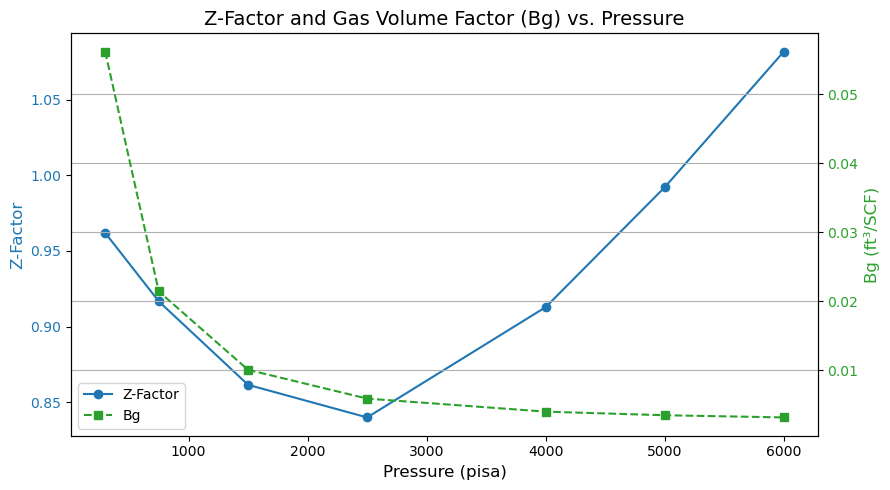

In [10]:
"Problem 2.10(c)"

import matplotlib.pyplot as plt 

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Z-factor on primary y_axis (left)
color_z = 'tab:blue'
ax1.set_xlabel('Pressure (pisa)', fontsize = 12)
ax1.set_ylabel('Z-Factor', color = color_z, fontsize = 12)
ax1.plot(pressures, z_factors, marker = 'o', linestyle = '-', color = color_z, label = 'Z-Factor')
ax1.tick_params(axis = 'y', labelcolor = color_z)

# Create a secondary y-axis (right for Bg)
ax2 = ax1.twinx()
color_bg = 'tab:green'
ax2.set_ylabel('Bg (ft³/SCF)', color = color_bg, fontsize = 12)
ax2.plot(pressures, bg_values, marker = 's', linestyle = '--', color = color_bg, label = 'Bg')
ax2.tick_params(axis = 'y', labelcolor = color_bg)

# Title and Layout
plt.title('Z-Factor and Gas Volume Factor (Bg) vs. Pressure', fontsize = 14)
fig.tight_layout()

# Add legends for both lines (Optional)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc = 'lower left')

plt.grid(True)
plt.show()